<a href="https://colab.research.google.com/github/GallardoCoriaMarcelo/Laboratorios/blob/main/2do_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Cargar el conjunto de datos desde un archivo CSV
data = pd.read_csv('/content/drive/MyDrive/Dataset_no_supervisado/2do_Parcial/panic_disorder_dataset_training.csv')

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Eliminar columnas no necesarias
data = data.drop(['Participant ID', 'Panic Disorder Diagnosis'], axis=1)

print(data.head())  # Muestra las primeras filas del DataFrame
print(data.info())  # Muestra información sobre las columnas y tipos de datos
print(data.describe())  # Proporciona estadísticas descriptivas de los datos numéricos

   Age  Gender Family History Personal History Current Stressors  \
0   38    Male             No              Yes          Moderate   
1   51    Male             No               No              High   
2   32  Female            Yes               No              High   
3   64  Female             No               No          Moderate   
4   31    Male            Yes               No          Moderate   

              Symptoms  Severity Impact on Life Demographics Medical History  \
0  Shortness of breath      Mild           Mild        Rural        Diabetes   
1        Panic attacks      Mild           Mild        Urban          Asthma   
2        Panic attacks      Mild    Significant        Urban        Diabetes   
3           Chest pain  Moderate       Moderate        Rural        Diabetes   
4        Panic attacks      Mild       Moderate        Rural          Asthma   

   Psychiatric History Substance Use Coping Mechanisms Social Support  \
0     Bipolar disorder           NaN 

In [5]:
# Obtener los valores únicos de las columnas "cut", "color" y "clarity"
unique_Symptoms_values = data['Symptoms'].unique()
unique_Impact_Life_values = data['Impact on Life'].unique()
unique_Psychiatric_History_values = data['Psychiatric History'].unique()
unique_Coping_Mechanisms_values = data['Coping Mechanisms'].unique()
unique_Lifestyle_Factors_values = data['Lifestyle Factors'].unique()

# Contar el número de valores únicos
num_unique_Symptoms_values = len(unique_Symptoms_values)
num_unique_Impact_Life_values = len(unique_Impact_Life_values)
num_unique_Psychiatric_History_values = len(unique_Psychiatric_History_values)
num_unique_Coping_Mechanisms_values = len(unique_Coping_Mechanisms_values)
num_unique_Lifestyle_Factors_values = len(unique_Lifestyle_Factors_values)

# Mostrar valores únicos en las columnas "cut", "color" y "clarity"
print(f'Valores únicos en la columna "Symptoms": {unique_Symptoms_values}')
print(f'Valores únicos en la columna "Impact on Life": {unique_Impact_Life_values}')
print(f'Valores únicos en la columna "Psychiatric History": {unique_Psychiatric_History_values}')
print(f'Valores únicos en la columna "Impact on Life": {unique_Coping_Mechanisms_values}')
print(f'Valores únicos en la columna "Psychiatric History": {unique_Lifestyle_Factors_values}')

print(f"Número de valores únicos en 'Symptoms': {num_unique_Symptoms_values}")
print(f"Número de valores únicos en 'Impact on Life': {num_unique_Impact_Life_values}")
print(f"Número de valores únicos en 'Psychiatric History': {num_unique_Psychiatric_History_values}")
print(f"Número de valores únicos en 'Impact on Life': {num_unique_Coping_Mechanisms_values}")
print(f"Número de valores únicos en 'Psychiatric History': {num_unique_Lifestyle_Factors_values}")

Valores únicos en la columna "Symptoms": ['Shortness of breath' 'Panic attacks' 'Chest pain' 'Dizziness'
 'Fear of losing control']
Valores únicos en la columna "Impact on Life": ['Mild' 'Significant' 'Moderate']
Valores únicos en la columna "Psychiatric History": ['Bipolar disorder' 'Anxiety disorder' 'Depressive disorder' nan]
Valores únicos en la columna "Impact on Life": ['Socializing' 'Exercise' 'Seeking therapy' 'Meditation']
Valores únicos en la columna "Psychiatric History": ['Sleep quality' 'Exercise' 'Diet']
Número de valores únicos en 'Symptoms': 5
Número de valores únicos en 'Impact on Life': 3
Número de valores únicos en 'Psychiatric History': 4
Número de valores únicos en 'Impact on Life': 4
Número de valores únicos en 'Psychiatric History': 3


In [6]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador para cada columna
le_symptoms = LabelEncoder()
le_impact_life = LabelEncoder()
le_psychiatric_history = LabelEncoder()
le_Family_History = LabelEncoder()
le_Personal_History = LabelEncoder()
le_Current_Stressors = LabelEncoder()
le_Gender = LabelEncoder()
le_Severity = LabelEncoder()
le_Demographics = LabelEncoder()
le_Medical_History = LabelEncoder()
le_Substance_Use = LabelEncoder()
le_Coping_Mechanisms = LabelEncoder()
le_Social_Support = LabelEncoder()
le_Lifestyle_Factors = LabelEncoder()

# Aplicar el codificador a las columnas
data['Symptoms'] = le_symptoms.fit_transform(data['Symptoms'])
data['Impact on Life'] = le_impact_life.fit_transform(data['Impact on Life'])
data['Psychiatric History'] = le_psychiatric_history.fit_transform(data['Psychiatric History'].fillna('Unknown'))
data['Family History'] = le_Family_History.fit_transform(data['Family History'])
data['Personal History'] = le_Personal_History.fit_transform(data['Personal History'])
data['Current Stressors'] = le_Current_Stressors.fit_transform(data['Current Stressors'])
data['Gender'] = le_Gender.fit_transform(data['Gender'])
data['Severity'] = le_Severity.fit_transform(data['Severity'])
data['Demographics'] = le_Demographics.fit_transform(data['Demographics'])
data['Medical History'] = le_Medical_History.fit_transform(data['Medical History'])
data['Substance Use'] = le_Substance_Use.fit_transform(data['Substance Use'])
data['Coping Mechanisms'] = le_Coping_Mechanisms.fit_transform(data['Coping Mechanisms'])
data['Social Support'] = le_Social_Support.fit_transform(data['Social Support'])
data['Lifestyle Factors'] = le_Lifestyle_Factors.fit_transform(data['Lifestyle Factors'])

print(data)


       Age  Gender  Family History  Personal History  Current Stressors  \
0       38       1               0                 1                  2   
1       51       1               0                 0                  0   
2       32       0               1                 0                  0   
3       64       0               0                 0                  2   
4       31       1               1                 0                  2   
...    ...     ...             ...               ...                ...   
99995   22       1               1                 0                  0   
99996   57       0               0                 1                  1   
99997   20       1               1                 0                  2   
99998   56       0               1                 1                  0   
99999   18       1               0                 0                  1   

       Symptoms  Severity  Impact on Life  Demographics  Medical History  \
0             4        

In [7]:
# Escalar los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Mostrar el DataFrame resultante
print(data_scaled)

[[-2.49603754e-01  9.98960540e-01 -1.00084035e+00 ...  1.33697126e+00
  -1.22224446e+00  1.23035861e+00]
 [ 6.89761329e-01  9.98960540e-01 -1.00084035e+00 ... -1.34551947e+00
  -1.22224446e+00  1.23035861e+00]
 [-6.83156870e-01 -1.00104054e+00  9.99160353e-01 ...  4.42807686e-01
   1.22469140e+00  3.17839675e-03]
 ...
 [-1.55026310e+00  9.98960540e-01  9.99160353e-01 ...  4.42807686e-01
   1.22346793e-03  3.17839675e-03]
 [ 1.05105559e+00 -1.00104054e+00  9.99160353e-01 ...  1.33697126e+00
  -1.22224446e+00  1.23035861e+00]
 [-1.69478081e+00  9.98960540e-01 -1.00084035e+00 ... -4.51355890e-01
   1.22469140e+00  3.17839675e-03]]


In [11]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca = pca.fit(data_scaled)

explained_variance = pca.explained_variance_
print('Varianza por cada componente: ')
print(explained_variance)

#Varianza acumulada
PVE = pca.explained_variance_ratio_
print('Proporcion de Varianza Explicada por cada componente: ')
print(PVE)

#Criterio de varianza explicada
np.cumsum(pca.explained_variance_ratio_)

Varianza por cada componente: 
[1.02074694 1.01878734 1.0133823  1.01189649 1.00886917 1.0055589
 1.0011809  1.00063039 0.99791385 0.9945246  0.99092836 0.99047702
 0.986627   0.98149992 0.97712681]
Proporcion de Varianza Explicada por cada componente: 
[0.06804912 0.06791848 0.06755814 0.06745909 0.06725727 0.06703659
 0.06674473 0.06670803 0.06652692 0.06630098 0.06606123 0.06603114
 0.06577448 0.06543267 0.06514114]


array([0.06804912, 0.13596759, 0.20352574, 0.27098483, 0.3382421 ,
       0.40527869, 0.47202342, 0.53873144, 0.60525837, 0.67155934,
       0.73762057, 0.80365171, 0.86942619, 0.93485886, 1.        ])

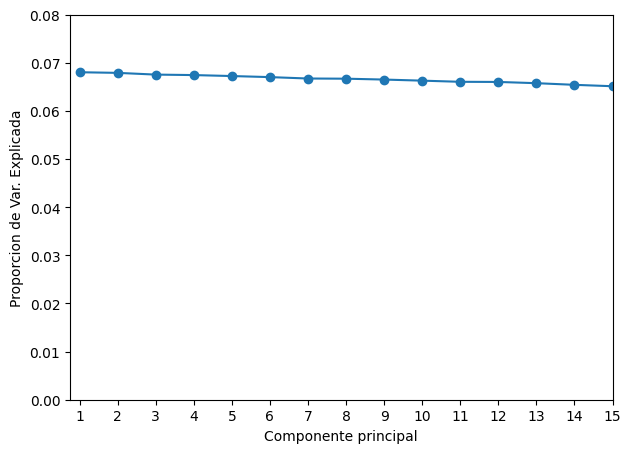

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proporcion de Var. Explicada')
plt.xlabel('Componente principal')
plt.xlim(0.75,4.25)
plt.ylim(0,0.08)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.show()

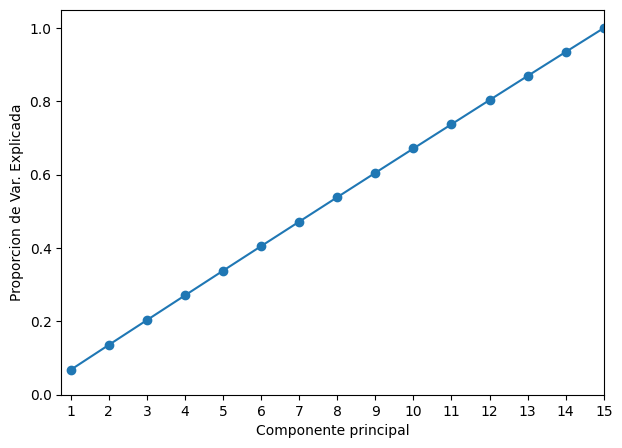

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], np.cumsum(pca.explained_variance_ratio_), '-o')
plt.ylabel('Proporcion de Var. Explicada')
plt.xlabel('Componente principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.show()

In [23]:
# Cargar el conjunto de datos desde un archivo CSV
dataTest = pd.read_csv('/content/drive/MyDrive/Dataset_no_supervisado/2do_Parcial/panic_disorder_dataset_training.csv')
dataTest = dataTest.drop(['Participant ID'], axis=1)

# Crear un codificador para cada columna
le_symptoms = LabelEncoder()
le_impact_life = LabelEncoder()
le_psychiatric_history = LabelEncoder()
le_Family_History = LabelEncoder()
le_Personal_History = LabelEncoder()
le_Current_Stressors = LabelEncoder()
le_Gender = LabelEncoder()
le_Severity = LabelEncoder()
le_Demographics = LabelEncoder()
le_Medical_History = LabelEncoder()
le_Substance_Use = LabelEncoder()
le_Coping_Mechanisms = LabelEncoder()
le_Social_Support = LabelEncoder()
le_Lifestyle_Factors = LabelEncoder()

# Aplicar el codificador a las columnas
dataTest['Symptoms'] = le_symptoms.fit_transform(data['Symptoms'])
dataTest['Impact on Life'] = le_impact_life.fit_transform(data['Impact on Life'])
dataTest['Psychiatric History'] = le_psychiatric_history.fit_transform(data['Psychiatric History'].fillna('Unknown'))
dataTest['Family History'] = le_Family_History.fit_transform(data['Family History'])
dataTest['Personal History'] = le_Personal_History.fit_transform(data['Personal History'])
dataTest['Current Stressors'] = le_Current_Stressors.fit_transform(data['Current Stressors'])
dataTest['Gender'] = le_Gender.fit_transform(data['Gender'])
dataTest['Severity'] = le_Severity.fit_transform(data['Severity'])
dataTest['Demographics'] = le_Demographics.fit_transform(data['Demographics'])
dataTest['Medical History'] = le_Medical_History.fit_transform(data['Medical History'])
dataTest['Substance Use'] = le_Substance_Use.fit_transform(data['Substance Use'])
dataTest['Coping Mechanisms'] = le_Coping_Mechanisms.fit_transform(data['Coping Mechanisms'])
dataTest['Social Support'] = le_Social_Support.fit_transform(data['Social Support'])
dataTest['Lifestyle Factors'] = le_Lifestyle_Factors.fit_transform(data['Lifestyle Factors'])

In [26]:
# Escalar los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
data_scaled2 = scaler.fit_transform(dataTest)

# Mostrar el DataFrame resultante
print(data_scaled2)

[[-1.73203349e+00 -2.49603754e-01  9.98960540e-01 ... -1.22224446e+00
   1.23035861e+00 -2.11585261e-01]
 [-1.73199885e+00  6.89761329e-01  9.98960540e-01 ... -1.22224446e+00
   1.23035861e+00 -2.11585261e-01]
 [-1.73196421e+00 -6.83156870e-01 -1.00104054e+00 ...  1.22469140e+00
   3.17839675e-03 -2.11585261e-01]
 ...
 [ 1.73196421e+00 -1.55026310e+00  9.98960540e-01 ...  1.22346793e-03
   3.17839675e-03 -2.11585261e-01]
 [ 1.73199885e+00  1.05105559e+00 -1.00104054e+00 ... -1.22224446e+00
   1.23035861e+00  4.72622713e+00]
 [ 1.73203349e+00 -1.69478081e+00  9.98960540e-01 ...  1.22469140e+00
   3.17839675e-03 -2.11585261e-01]]


In [27]:
from sklearn.cluster import KMeans

# Definir el número de clusters deseado
k = 2

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Entrenar el modelo (sin utilizar etiquetas de cluster conocidas)
kmeans.fit(data_scaled2)

# Obtener las etiquetas predichas y los centroides de los clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

print(dataTest[('Panic Disorder Diagnosis')])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 1 0 1]
[[-4.05196630e-03  1.83734183e-03  9.72623384e-04  2.96229137e-02
   9.50004342e-01 -1.69476757e-02  9.18865476e-03  9.05099463e-03
   2.07316847e-02 -8.36220700e-03 -7.02643233e-03 -5.99374184e-03
   4.88449355e-03  5.20444785e-03  4.40304538e-03  3.58379791e-02
   2.01852926e-01]
 [ 4.24733178e-03 -1.92592923e-03 -1.01951840e-03 -3.10511819e-02
  -9.95808783e-01  1.77648076e-02 -9.63168557e-03 -9.48738816e-03
  -2.17312625e-02  8.76539065e-03  7.36521162e-03  6.28272998e-03
  -5.11999931e-03 -5.45538020e-03 -4.61533812e-03 -3.75659066e-02
  -2.11585261e-01]]
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Panic Disorder Diagnosis, Length: 100000, dtype: int64
